## =========================================
##                                                             Amazon Sales Report
## =========================================

### 1. Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data

In [47]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Amazon Sale Report.csv.zip')
df = df.drop('Unnamed: 22',axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19692\4210738872.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Amazon Sale Report.csv.zip')


### 3. Initial Data Inspection

In [48]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [49]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [50]:
df.shape

(128975, 23)

### 4. Data Understanding

In [51]:
# Each row represents a product within an order, not a full order
df['Order ID'].nunique()
print(f"Out of {df['Order ID'].shape[0]} rows, there are {df['Order ID'].nunique()} unique Order IDs. This means each row represents a product, not necessarily a full order.")

Out of 128975 rows, there are 120378 unique Order IDs. This means each row represents a product, not necessarily a full order.


In [52]:
missing_amount= df[df['Amount'].isnull()]
missing_amount['Status'].value_counts()

Status
Cancelled                       7566
Shipped                          208
Shipped - Delivered to Buyer       8
Shipping                           8
Shipped - Returned to Seller       3
Pending                            2
Name: count, dtype: int64

In [53]:
df[(df['Status']=='Shipped') & (df['Amount'].isnull())]['Sales Channel '].value_counts()

Sales Channel 
Non-Amazon    115
Amazon.in      93
Name: count, dtype: int64

In [54]:
df[(df['Status']=='Shipped') & (df['Amount'].isnull())]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
937,937,S02-5278980-4327051,04-30-22,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,...,15,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN
1057,1057,S02-9107114-0460608,04-30-22,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,...,2,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN
1615,1615,405-7790745-1369118,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3518,JNE3518-KR-M,kurta,...,0,NaN,NaN,RISHIKESH,UTTARAKHAND,249201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
1989,1989,171-9673855-2321133,04-29-22,Shipped,Amazon,Amazon.in,Expedited,SET232,SET232-KR-PP-S,Set,...,0,NaN,NaN,DHARUHERA,HARYANA,123106.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
2424,2424,404-7478762-7926753,04-29-22,Shipped,Amazon,Amazon.in,Expedited,SET331,SET331-KR-NP-S,Set,...,0,NaN,NaN,Gangapur city,Rajshthan,322201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124616,124616,S02-2059602-9568060,06-04-22,Shipped,Amazon,Non-Amazon,Standard,JNE3577,JNE3577-KR-S,kurta,...,1,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN
124617,124617,S02-3811761-8377519,06-04-22,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,...,2,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN
124619,124619,S02-5216693-3162561,06-04-22,Shipped,Amazon,Non-Amazon,Standard,SET154,SET154-KR-NP-XXL,Set,...,1,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN
124621,124621,S02-7324586-1573702,06-04-22,Shipped,Amazon,Non-Amazon,Standard,SET097,SET097-KR-PP-XXXL,Set,...,1,NaN,NaN,Surat,Gujarat,394210.0,IN,NaN,False,NaN


### 5. Data Cleaning

In [55]:
# Set Amount = 0 for cancelled orders with missing financial values
df.loc[(df['Status']=='Cancelled') & (df['Amount'].isnull()), 'Amount'] =0

In [56]:
df['Date']= pd.to_datetime(df['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19692\2691600196.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


In [57]:
df.columns = df.columns.str.strip()

In [58]:
# Fill missing currency values assuming all transactions are in INR
df['currency'] = df['currency'].fillna('INR')

In [59]:
# Remove 'Shipped' orders (non-delivered), less than 0.05% of data
df = df[~(df['Amount'].isnull())& (df['Status']!='Shipped')]

In [60]:
df[['Courier Status','Status','Amount']]

,Courier Status,Status,Amount
0,NaN,Cancelled,647.62
1,Shipped,Shipped - Delivered to Buyer,406.00
3,NaN,Cancelled,753.33
7,Shipped,Shipped - Delivered to Buyer,399.00
8,Cancelled,Cancelled,0.00
...,...,...,...
128961,Unshipped,Cancelled,771.00
128962,Unshipped,Cancelled,665.00
128965,Unshipped,Cancelled,574.00
128967,Cancelled,Cancelled,0.00


In [61]:
df[ (df['Amount']==0) & (df['Status']!='Shipped')]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,0,INR,0.0,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,0,INR,0.0,GUWAHATI,ASSAM,781003.0,IN,NaN,False,Easy Ship
65,65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,...,0,INR,0.0,Dahod,Gujarat,389151.0,IN,NaN,False,NaN
84,84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,0,INR,0.0,HYDERABAD,TELANGANA,500072.0,IN,NaN,False,NaN
95,95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,...,0,INR,0.0,PUNE,MAHARASHTRA,411046.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,...,0,INR,0.0,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,NaN,False,NaN
128907,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,...,0,INR,0.0,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,NaN,False,NaN
128908,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,...,0,INR,0.0,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,NaN,False,NaN
128958,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,...,0,INR,0.0,Bengaluru,KARNATAKA,560037.0,IN,NaN,False,NaN


In [62]:
(df['Amount']==0).sum()

np.int64(8391)

In [63]:
df.groupby('Status')['Amount'].count()

Status
Cancelled                        18332
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28761
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                973
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1950
Shipped - Returning to Seller      145
Name: Amount, dtype: int64

In [64]:
df[ (df['fulfilled-by'].isnull())]['Fulfilment'].value_counts()

Fulfilment
Amazon    11884
Name: count, dtype: int64

In [65]:
# Fill missing fulfilled-by values based on Fulfilment = Amazon
df['fulfilled-by']=df['fulfilled-by'].fillna('Amazon')

In [66]:
# Create Net Revenue: only delivered orders generate revenue
df['Net_amount']= df['Amount'].where(df['Status']== 'Shipped - Delivered to Buyer',0)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Net_amount
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,406.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,0.0
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,399.0
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,INR,0.00,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128961,128961,402-0082204-6323568,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,...,INR,771.00,Junagadh,Gujarat,362001.0,IN,NaN,False,Amazon,0.0
128962,128962,408-9803724-6565965,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,kurta,...,INR,665.00,MUMBAI,MAHARASHTRA,400056.0,IN,NaN,False,Amazon,0.0
128965,128965,408-5154281-4593912,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,...,INR,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,NaN,False,Amazon,0.0
128967,128967,404-5182288-1653947,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,...,INR,0.00,Kolkata,WEST BENGAL,700040.0,IN,NaN,False,Amazon,0.0


In [67]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6861
Qty                       0
currency                  0
Amount                    0
ship-city                17
ship-state               17
ship-postal-code         17
ship-country             17
promotion-ids         18224
B2B                       0
fulfilled-by              0
Net_amount                0
dtype: int64

### 6. Exploratory Data Analysis (EDA)

#### 6.1 overall Performance

In [68]:
# Activity Size
number_of_unique_orders = df['Order ID'].nunique()
number_of_orders = df['Order ID'].count()
percent_unique = (number_of_unique_orders / number_of_orders) * 100
total_products_sold = df['Qty'].sum()
avg_products_per_order = df.groupby('Order ID')['Qty'].sum().mean()

print(f"- Number of unique orders: {number_of_unique_orders} ({percent_unique:.2f}% of all rows)")
print(f"- Total products sold (Qty summed): {total_products_sold}")
print(f"- Average number of products per unique order: {avg_products_per_order:.2f}")

- Number of unique orders: 47544 (92.95% of all rows)
- Total products sold (Qty summed): 38632
- Average number of products per unique order: 0.81


Total Net Revenue: 18650815.0
Total Raw Amount: 28268423.30
Revenue lost due to cancellations: 9617608.30 (34.02%)



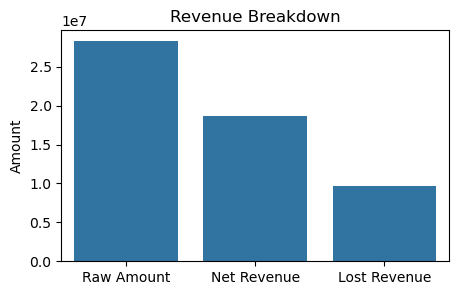

In [69]:
# Total Revenue
# Because the raw Amount column includes canceled orders, it gives a misleading value for the actual revenue.
# Therefore, we use Net_Amount after excluding incomplete or canceled orders.
total_amount = df['Amount'].sum()
total_net_amount = df['Net_amount'].sum()
lost_amount = total_amount - total_net_amount
lost_percent = (lost_amount/total_amount)*100

print(f"Total Net Revenue: {total_net_amount}")
print(f"Total Raw Amount: {total_amount:.2f}")
print(f"Revenue lost due to cancellations: {lost_amount:.2f} ({lost_percent:.2f}%)")
print('')

revenue_df = pd.DataFrame({
    'Type': ['Raw Amount', 'Net Revenue', 'Lost Revenue'],
    'Value': [total_amount, total_net_amount, lost_amount]
})
plt.figure(figsize=(5,3))
sns.barplot(data=revenue_df, x='Type', y='Value')
plt.title('Revenue Breakdown')
plt.ylabel('Amount')
plt.xlabel('')
plt.show()

- Completed orders: 26566 (55.88%)
- Cancelled orders: 17185 (36.15%)
- Pending orders: 584 (1.23%)



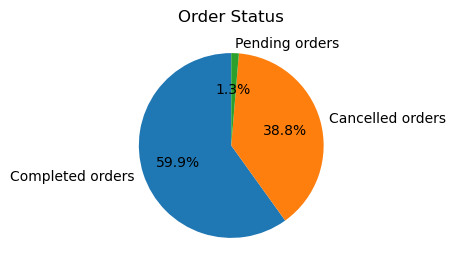

In [70]:
# Order status
Order_status= df.groupby('Status')['Order ID'].nunique()
completed_orders = Order_status['Shipped - Delivered to Buyer'] 
#completed_orders = df[df['Status']=='Shipped - Delivered to Buyer']['Order ID'].nunique()

cancelled_orders = Order_status['Cancelled'] 
pending_orders = df[df['Status']=='Pending']['Order ID'].nunique()
percent_completed_orders = (completed_orders/number_of_unique_orders)*100
percent_cancelled_orders = (cancelled_orders/number_of_unique_orders)*100
percent_pending_orders = (pending_orders/number_of_unique_orders)*100

print(f"- Completed orders: {completed_orders} ({percent_completed_orders:.2f}%)")
print(f"- Cancelled orders: {cancelled_orders} ({percent_cancelled_orders:.2f}%)")
print(f"- Pending orders: {pending_orders} ({percent_pending_orders:.2f}%)")
print('')

labels = ['Completed orders', 'Cancelled orders','Pending orders']
Values = [completed_orders, cancelled_orders,pending_orders ]

plt.figure(figsize=(5,3))
plt.pie(Values, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Order Status')
plt.xlabel('')
plt.show()

- Unshipped orders: 6072 (12.77%)
- Cancelled & Unshipped orders: 5226
- Percentage of cancelled orders within unshipped: 86.07%



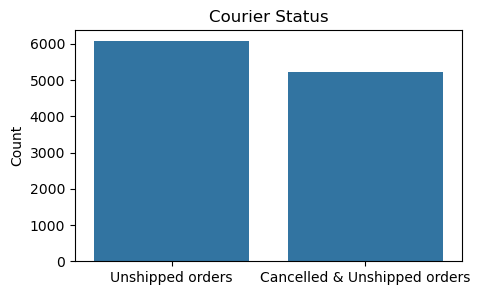

In [71]:
#Courier Status
Courier_Status = df.groupby('Courier Status')['Order ID'].nunique()
unshipped_orders = Courier_Status['Unshipped']
percent_unshipped = (unshipped_orders/number_of_unique_orders)*100

cancelled_and_unshipped = df[(df['Status']=='Cancelled') & (df['Courier Status']=='Unshipped')]['Order ID'].nunique()
percent_cancelled_from_unshipped = (cancelled_and_unshipped/unshipped_orders)*100

print(f"- Unshipped orders: {unshipped_orders} ({percent_unshipped:.2f}%)")
print(f"- Cancelled & Unshipped orders: {cancelled_and_unshipped}")
print(f"- Percentage of cancelled orders within unshipped: {percent_cancelled_from_unshipped:.2f}%")
print('')

Courier_Status_df = pd.DataFrame({
    'Type': ['Unshipped orders', 'Cancelled & Unshipped orders'],
    'Value': [unshipped_orders, cancelled_and_unshipped]
})
plt.figure(figsize=(5,3))
sns.barplot(data=Courier_Status_df, x='Type', y='Value')
plt.title('Courier Status')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Overall Performance – Key Insights

- Around 34% of gross revenue is lost due to cancellations, showing that revenue leakage is a major business issue.

- Only ~56% of orders are successfully completed, while ~36% are cancelled, indicating a high failure rate in the order lifecycle.

- ~13% of all orders remain unshipped, and ~86% of those unshipped orders are eventually cancelled, highlighting shipping as a critical bottleneck.

- Improving fulfillment efficiency could recover a significant portion of lost revenue without increasing demand.

#### 6.2 Geographic Analysis

Geographic Overview
----------------------------------------
- Total orders in India: 47528
- Top state by number of orders: MAHARASHTRA (7869 orders)

Top 5 states by order volume:
  • MAHARASHTRA: 7869 orders
  • KARNATAKA: 5853 orders
  • UTTAR PRADESH: 4196 orders
  • TAMIL NADU: 3943 orders
  • TELANGANA: 3941 orders

- Top 5 states contribute 54.29% of total orders

- Number of weak states (<500 orders): 41
- Orders from weak states: 2546
- Percentage of total orders from weak states: 5.36%



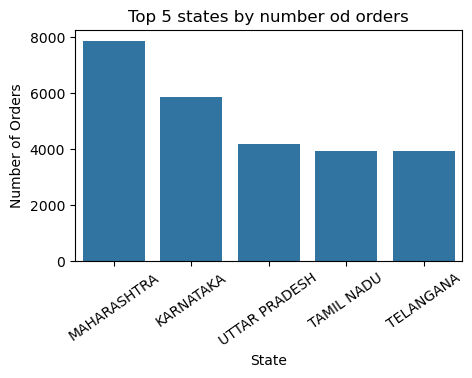

In [72]:
orders_by_country = df.groupby('ship-country')['Order ID'].nunique()
india_orders = orders_by_country.loc['IN']
orders_by_state = df.groupby('ship-state')['Order ID'].nunique().sort_values(ascending=False)
top_state = orders_by_state.idxmax()
top_state_orders = orders_by_state.max()
top_5_states= orders_by_state.head(5)
top_5_percent = (top_5_states.sum() / orders_by_state.sum()) * 100
weak_states= orders_by_state[orders_by_state<500]
num_weak_states=weak_states.count()
order_from_weak_states=weak_states.sum()
percent_weak_states = (order_from_weak_states / orders_by_state.sum()) * 100

print("Geographic Overview")
print("-" * 40)

print(f"- Total orders in India: {india_orders}")

print(f"- Top state by number of orders: {top_state} ({top_state_orders} orders)")

print("\nTop 5 states by order volume:")
for state, count in top_5_states.items():
    print(f"  • {state}: {count} orders")

print(f"\n- Top 5 states contribute {top_5_percent:.2f}% of total orders")

print(f"\n- Number of weak states (<500 orders): {num_weak_states}")
print(f"- Orders from weak states: {order_from_weak_states}")
print(f"- Percentage of total orders from weak states: {percent_weak_states:.2f}%")
print('')
state_df = top_5_states.reset_index()
state_df.columns=['State','Orders']

plt.figure(figsize=(5,3))
sns.barplot(data=state_df, x='State', y='Orders')
plt.xticks(rotation=35)
plt.title('Top 5 states by number od orders')
plt.ylabel('Number of Orders')
plt.show()

Top 5 States by Net Revenue:
  • MAHARASHTRA: 3135062.00
  • KARNATAKA: 2279856.00
  • UTTAR PRADESH: 1669881.00
  • TELANGANA: 1551447.00
  • TAMIL NADU: 1466364.00
Percentage of total Net Revenue from top 5 states: 54.17%

State of top orders are same with state of top revenue
Top 5 Cities by Net Revenue:
  • BENGALURU: 1463928.00
  • HYDERABAD: 1080750.00
  • MUMBAI: 881790.00
  • NEW DELHI: 866913.00
  • CHENNAI: 657872.00
Percentage of total Net Revenue from top 5 cities: 26.55%



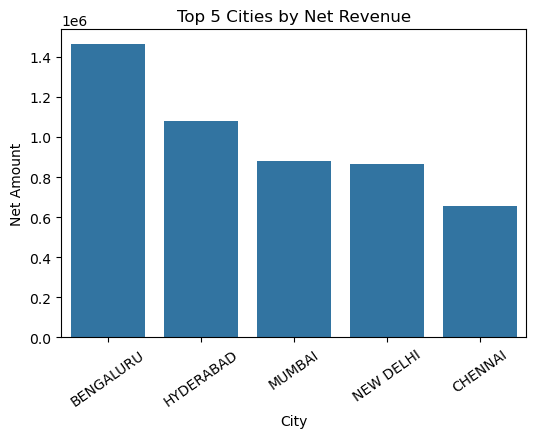

In [73]:
total_net_amount_for_each_state = df.groupby('ship-state')['Net_amount'].sum().sort_values(ascending=False)
top_5_revenue_state = total_net_amount_for_each_state.head(5)

total_net_amount_for_each_city = df.groupby('ship-city')['Net_amount'].sum().sort_values(ascending=False)
top_5_revenue_city = total_net_amount_for_each_city.head(5)

percent_top_revenue_state = (top_5_revenue_state.sum() / df['Net_amount'].sum()) * 100
percent_top_revenue_city = (top_5_revenue_city.sum() / df['Net_amount'].sum()) * 100

print("Top 5 States by Net Revenue:")
for state, revenue in top_5_revenue_state.items():
    print(f"  • {state}: {revenue:.2f}")

print(f"Percentage of total Net Revenue from top 5 states: {percent_top_revenue_state:.2f}%\n")
print("State of top orders are same with state of top revenue")

print("Top 5 Cities by Net Revenue:")
for city, revenue in top_5_revenue_city.items():
    print(f"  • {city}: {revenue:.2f}")

print(f"Percentage of total Net Revenue from top 5 cities: {percent_top_revenue_city:.2f}%")
print('')
city_df = top_5_revenue_city.reset_index()
city_df.columns = ['City', 'Net_Amount']

plt.figure(figsize=(6,4))
sns.barplot(data=city_df, x='City', y='Net_Amount')
plt.xticks(rotation=35)
plt.title('Top 5 Cities by Net Revenue')
plt.ylabel('Net Amount')
plt.show()

In [74]:
num_of_cancelled_orders_by_state = df[df['Status']=='Cancelled'].groupby('ship-state')['Order ID'].nunique().sort_values(ascending=False)
top_5_state_cancelling = num_of_cancelled_orders_by_state.head(5)

print("Top 5 states by cancelled orders:")
total_cancelled_top5 = top_5_state_cancelling.sum()

for state, count in top_5_state_cancelling.items():
    percent = (count / total_cancelled_top5) * 100
    print(f"  • {state}: {count} orders ({percent:.2f}%)")

print("\nObservation: The top 5 states with the most cancelled orders are the same as the top 5 states by total orders and by net revenue.")

Top 5 states by cancelled orders:
  • MAHARASHTRA: 2778 orders (29.71%)
  • KARNATAKA: 2097 orders (22.43%)
  • UTTAR PRADESH: 1531 orders (16.37%)
  • TELANGANA: 1505 orders (16.09%)
  • TAMIL NADU: 1440 orders (15.40%)

Observation: The top 5 states with the most cancelled orders are the same as the top 5 states by total orders and by net revenue.


In [75]:
num_of_unshipped_orders_by_state = df[df['Courier Status']=='Unshipped'].groupby('ship-state')['Order ID'].nunique().sort_values(ascending=False)
top_5_state_unshipped = num_of_unshipped_orders_by_state.head(5)
total_unshipped_top5 = top_5_state_unshipped.sum()

print("Top 5 states with the most unshipped orders:")
for state, count in top_5_state_unshipped.items():
    percent = (count / total_unshipped_top5) * 100
    print(f"  • {state}: {count} orders ({percent:.2f}%)")

print("\nObservation: The top 5 states with the most unshipped orders are the same as the top 5 states by total orders, cancelled orders, and net revenue.")

Top 5 states with the most unshipped orders:
  • MAHARASHTRA: 1074 orders (31.49%)
  • KARNATAKA: 821 orders (24.07%)
  • TELANGANA: 539 orders (15.80%)
  • TAMIL NADU: 491 orders (14.39%)
  • UTTAR PRADESH: 486 orders (14.25%)

Observation: The top 5 states with the most unshipped orders are the same as the top 5 states by total orders, cancelled orders, and net revenue.


Geographic Analysis – Key Insights

- 100% of orders come from a single country (India), meaning the business is fully dependent on one geographic market.

- Order demand is highly concentrated: the top 5 states generate ~54% of total orders and ~54% of total net revenue, indicating strong regional dependence.

- The same top 5 states dominate volume, revenue, cancellations, and unshipped orders, which means operational issues scale directly with demand concentration, not with weaker regions.

- Weak states (41 states with <500 orders) contribute only ~5.4% of total orders, showing a long tail of low-impact regions with minimal business significance.

- Top 5 cities generate ~26.6% of total net revenue, a lower concentration than states, suggesting revenue is more distributed at the city level than at the state level.

- High-performing states (e.g. Maharashtra, Karnataka) also account for the largest share of cancellations and unshipped orders, implying that logistics and fulfillment challenges are driven by volume pressure rather than geographic inefficiency.

- Improving shipping and cancellation handling in high-volume states would have a far greater impact than expanding into low-demand regions.

#### 6.3 Time Analysis

Monthly Net Revenue:
  • April: 7453429.00
  • May: 6932202.00
  • June: 4255014.00
  • March: 10170.00

Top month by Net Revenue: April with 7453429.00
Number of Orders and Products by Month:
  • April: 18682 orders (15158 products)
  • May: 15717 orders (12930 products)
  • June: 13110 orders (10523 products)
  • March: 35 orders (21 products)



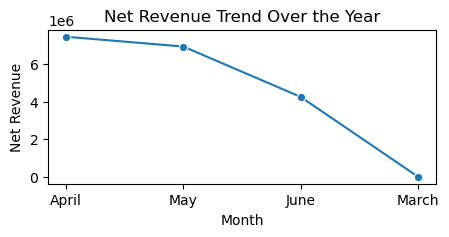

In [76]:
monthly_revenue = df.groupby(df['Date'].dt.strftime('%B'))['Net_amount'].sum().sort_values(ascending=False)
top_month=monthly_revenue .idxmax()
top_value=monthly_revenue.loc[top_month]
number_of_orders_by_months=df.groupby(df['Date'].dt.strftime('%B'))['Order ID'].nunique().sort_values(ascending=False)
number_of_products_by_months = df.groupby(df['Date'].dt.strftime('%B'))['Qty'].sum().sort_values(ascending=False)

print("Monthly Net Revenue:")
for month, revenue in monthly_revenue.items():
    print(f"  • {month}: {revenue:.2f}")

print(f"\nTop month by Net Revenue: {top_month} with {top_value:.2f}")

print("Number of Orders and Products by Month:")
for month in number_of_orders_by_months.index:
    orders = number_of_orders_by_months[month]
    products = number_of_products_by_months.get(month, 0)
    print(f"  • {month}: {orders} orders ({products} products)")
print('')
plt.figure(figsize=(5,2))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Net Revenue Trend Over the Year')
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.show()

In [77]:
cancelled_orders_by_month = df[df['Status']=='Cancelled'].groupby(df['Date'].dt.strftime('%B'))['Order ID'].nunique().sort_values(ascending=False)
unshipped_orders_by_month = df[df['Courier Status']=='Unshipped'].groupby(df['Date'].dt.strftime('%B'))['Order ID'].nunique().sort_values(ascending=False
                                                                                                                                         )
print("\nNumber of Cancelled Orders by Month:")
for month, orders in cancelled_orders_by_month.items():
    percent=(orders / df['Order ID'].nunique())*100
    print(f"  • {month}: {orders} orders ({percent:.2f}%)")

print("\nNumber of Unshipped Orders by Month:")
for month, orders in unshipped_orders_by_month.items():
    percent=(orders / df['Order ID'].nunique())*100
    print(f"  • {month}: {orders} orders ({percent:.2f}%)")
print('')


Number of Cancelled Orders by Month:
  • April: 6726 orders (14.15%)
  • May: 5484 orders (11.53%)
  • June: 4957 orders (10.43%)
  • March: 18 orders (0.04%)

Number of Unshipped Orders by Month:
  • June: 2473 orders (5.20%)
  • April: 1982 orders (4.17%)
  • May: 1613 orders (3.39%)
  • March: 4 orders (0.01%)



In [78]:
monthly_category_counts = df.groupby([df['Date'].dt.strftime('%B'), 'Category'])['Order ID'].count()

most_sold_category_by_month = monthly_category_counts.groupby(level=0).idxmax()
most_sold_count_by_month = monthly_category_counts.groupby(level=0).max()

for month, (m, category) in most_sold_category_by_month.items():
    count = most_sold_count_by_month[month]
    print(f"• {month}: {category} ({count} products sold)")

• April: kurta (8522 products sold)
• June: Set (5272 products sold)
• March: Set (15 products sold)
• May: Set (6254 products sold)


Time Analysis – Key Insights

- Total orders in India: 47,528

- Top 5 states (MAHARASHTRA, KARNATAKA, UTTAR PRADESH, TAMIL NADU, TELANGANA) contribute 54.29% of all orders

- Weak states (<500 orders) account for 5.36% of total orders

- Top 5 states also generate 54.17% of net revenue, while top 5 cities generate 26.55%

- MAHARASHTRA leads in orders (7,869), net revenue (3,135,062), cancelled orders (2,778), and unshipped orders (1,074)

- Top 5 states dominate cancelled (≈62%) and unshipped orders (≈88%)

- Orders and revenue are highly concentrated in a few states and cities, indicating operational focus and potential risk if issues occur in these regions

#### 6.4 Product Analysis

Top 5 Categories by Quantity Sold:
  • Set: 14568 units
  • kurta: 14142 units
  • Western Dress: 6451 units
  • Top: 2745 units
  • Ethnic Dress: 299 units

Top 5 categories account for 98.89% of total quantity sold

Least Sold Category by Quantity:
  • Saree: 30 units

Top 5 Categories by Net Revenue:
  • Set: 8800562.00
  • kurta: 4715208.00
  • Western Dress: 3868616.00
  • Top: 948734.00
  • Ethnic Dress: 165465.00

Top 5 categories account for 99.18% of total net revenue



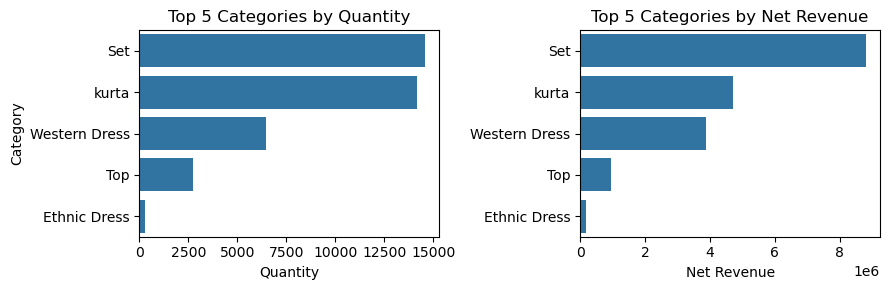

In [79]:
qty_by_category = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
top_5_categories_by_qty = qty_by_category.head(5)
least_sold_category_by_qty = qty_by_category.tail(1)

revenue_by_category = df.groupby('Category')['Net_amount'].sum().sort_values(ascending=False)
top_5_categories_by_revenue = revenue_by_category.head(5)

top_5_revenue_sum = top_5_categories_by_revenue.sum()
total_revenue = df['Net_amount'].sum()
top_5_revenue_percentage = (top_5_revenue_sum / total_revenue) * 100

top_5_qty_sum = top_5_categories_by_qty.sum()
total_qty = df['Qty'].sum()
top_5_qty_percentage = (top_5_qty_sum / total_qty) * 100

print("Top 5 Categories by Quantity Sold:")
for category, qty in top_5_categories_by_qty.items():
    print(f"  • {category}: {qty} units")

print(f"\nTop 5 categories account for {top_5_qty_percentage:.2f}% of total quantity sold")
print("\nLeast Sold Category by Quantity:")
for category, qty in least_sold_category_by_qty.items():
    print(f"  • {category}: {qty} units")

print("\nTop 5 Categories by Net Revenue:")
for category, revenue in top_5_categories_by_revenue.items():
    print(f"  • {category}: {revenue:.2f}")

print(f"\nTop 5 categories account for {top_5_revenue_percentage:.2f}% of total net revenue")
print('')
fig, axes = plt.subplots(1, 2, figsize=(9,3))

sns.barplot(
    x=top_5_categories_by_qty.values,
    y=top_5_categories_by_qty.index,
    ax=axes[0]
)
axes[0].set_title('Top 5 Categories by Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Category')

sns.barplot(
    x=top_5_categories_by_revenue.values,
    y=top_5_categories_by_revenue.index,
    ax=axes[1]
)
axes[1].set_title('Top 5 Categories by Net Revenue')
axes[1].set_xlabel('Net Revenue')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [80]:
revenue_per_product = df.groupby('SKU')['Net_amount'].sum().sort_values(ascending=False)

percent_revenue_per_product = (revenue_per_product / revenue_per_product.sum()) * 100

top_products = percent_revenue_per_product.head(5)

top_products_percent = top_products.sum()
print(f"Top 5 products contribute {top_products_percent:.2f}% of total revenue")

Top 5 products contribute 5.99% of total revenue


Product Analysis - Ket Insight

- Top 5 categories generate ~99% of revenue and quantity, showing high concentration.

- Least sold category contributes minimally (30 units).

- Top 5 products (SKU) only 6% of revenue, indicating dispersed sales.

- Focus marketing/inventory on top categories; review low-performing SKUs.

#### 6.5 Fulfilment & Sales Channels Analysis

In [81]:
fulfilled_by =df.groupby('fulfilled-by')['Order ID'].nunique().sort_values(ascending=False)
fulfilled_by_renv =df.groupby('fulfilled-by')['Net_amount'].sum().sort_values(ascending=False) 
total_cancelled = df[df['Status']=='Cancelled']['Order ID'].nunique()
cancelled_by_fulfilled = df[df['Status']=='Cancelled'].groupby('fulfilled-by')['Order ID'].nunique()
total_unshipped = df[df['Courier Status']=='Unshipped']['Order ID'].nunique()
unshipped_by_fulfilled = df[df['Courier Status']=='Unshipped'].groupby('fulfilled-by')['Order ID'].nunique()

print("Number of Orders by Fulfilled-By:")
total_orders = df['Order ID'].nunique()
for method, orders in fulfilled_by.items():
    percent = (orders / total_orders) * 100
    print(f"• {method}: {orders} orders ({percent:.2f}%)")
print('')

print("Net Revenue by Fulfilled-By:")
total_revenue = df['Net_amount'].sum()
for method, revenue in fulfilled_by_renv.items():
    percent = (revenue / total_revenue) * 100
    print(f"• {method}: {revenue:.2f} ({percent:.2f}%)")
print('')

print("Cancelled Orders by Fulfilled-By (relative to cancelled orders):")
for f, orders in cancelled_by_fulfilled.items():
    percent = (orders / total_cancelled) * 100
    print(f"• {f}: {orders} orders ({percent:.2f}%)")

print("\nUnshipped Orders by Fulfilled-By (relative to unshipped orders):")
for f, orders in unshipped_by_fulfilled.items():
    percent = (orders / total_unshipped) * 100
    print(f"• {f}: {orders} orders ({percent:.2f}%)")


Number of Orders by Fulfilled-By:
• Easy Ship: 36376 orders (76.51%)
• Amazon: 11168 orders (23.49%)

Net Revenue by Fulfilled-By:
• Easy Ship: 18650815.00 (100.00%)
• Amazon: 0.00 (0.00%)

Cancelled Orders by Fulfilled-By (relative to cancelled orders):
• Amazon: 10803 orders (62.86%)
• Easy Ship: 6382 orders (37.14%)

Unshipped Orders by Fulfilled-By (relative to unshipped orders):
• Amazon: 5591 orders (92.08%)
• Easy Ship: 481 orders (7.92%)


In [82]:
b2b =df.groupby('B2B')['Order ID'].nunique().sort_values(ascending=False)
b2b_renv =df.groupby('B2B')['Net_amount'].sum().sort_values(ascending=False)
b2b_qty =df.groupby('B2B')['Qty'].sum().sort_values(ascending=False)

b2b_orders = df.groupby('B2B')['Order ID'].nunique()
total_orders = b2b_orders.sum()
print("Number of Orders by B2B:")
for b2b_value, orders in b2b_orders.items():
    percent = (orders / total_orders) * 100
    print(f"• {b2b_value}: {orders} orders ({percent:.2f}%)")
print("")

b2b_revenue = df.groupby('B2B')['Net_amount'].sum()
total_revenue = b2b_revenue.sum()
print("Net Revenue by B2B:")
for b2b_value, revenue in b2b_revenue.items():
    percent = (revenue / total_revenue) * 100
    print(f"• {b2b_value}: {revenue:.2f} ({percent:.2f}%)")
print("")

b2b_qty = df.groupby('B2B')['Qty'].sum()
total_qty = b2b_qty.sum()
print("Total Quantity Sold by B2B:")
for b2b_value, qty in b2b_qty.items():
    percent = (qty / total_qty) * 100
    print(f"• {b2b_value}: {qty} products ({percent:.2f}%)")

Number of Orders by B2B:
• False: 47247 orders (99.38%)
• True: 297 orders (0.62%)

Net Revenue by B2B:
• False: 18468552.00 (99.02%)
• True: 182263.00 (0.98%)

Total Quantity Sold by B2B:
• False: 38328 products (99.21%)
• True: 304 products (0.79%)


In [83]:
fulfilment_orders = df.groupby('Fulfilment')['Order ID'].nunique().sort_values(ascending=False)
total_orders_fulfilment = fulfilment_orders.sum()
print("Number of Orders by Fulfilment:")
for value, orders in fulfilment_orders.items():
    percent = (orders / total_orders_fulfilment) * 100
    print(f"• {value}: {orders} orders ({percent:.2f}%)")
print("")

fulfilment_revenue = df.groupby('Fulfilment')['Net_amount'].sum().sort_values(ascending=False)
total_revenue_fulfilment = fulfilment_revenue.sum()
print("Net Revenue by Fulfilment:")
for value, revenue in fulfilment_revenue.items():
    percent = (revenue / total_revenue_fulfilment) * 100
    print(f"• {value}: {revenue:.2f} ({percent:.2f}%)")
print("")

cancelled_by_fulfilment = df[df['Status']=='Cancelled'].groupby('Fulfilment')['Order ID'].nunique().sort_values(ascending=False)
print("Cancelled Orders by Fulfilment (relative to total cancelled orders):")
for value, orders in cancelled_by_fulfilment.items():
    percent = (orders / total_cancelled) * 100
    print(f"• {value}: {orders} orders ({percent:.2f}%)")
print("")

unshipped_by_fulfilment = df[df['Courier Status']=='Unshipped'].groupby('Fulfilment')['Order ID'].nunique().sort_values(ascending=False)
print("Unshipped Orders by Fulfilment (relative to total unshipped orders):")
for value, orders in unshipped_by_fulfilment.items():
    percent = (orders / total_unshipped) * 100
    print(f"• {value}: {orders} orders ({percent:.2f}%)")

Number of Orders by Fulfilment:
• Merchant: 36376 orders (76.51%)
• Amazon: 11168 orders (23.49%)

Net Revenue by Fulfilment:
• Merchant: 18650815.00 (100.00%)
• Amazon: 0.00 (0.00%)

Cancelled Orders by Fulfilment (relative to total cancelled orders):
• Amazon: 10803 orders (62.86%)
• Merchant: 6382 orders (37.14%)

Unshipped Orders by Fulfilment (relative to total unshipped orders):
• Amazon: 5591 orders (92.08%)
• Merchant: 481 orders (7.92%)


In [84]:
sales_orders = df.groupby('Sales Channel')['Order ID'].nunique()
total_orders_sales = sales_orders.sum()
print("Number of Orders by Sales Channel:")
for value, orders in sales_orders.items():
    percent = (orders / total_orders_sales) * 100
    print(f"• {value}: {orders} orders ({percent:.2f}%)")
print("")

sales_revenue = df.groupby('Sales Channel')['Net_amount'].sum()
total_revenue_sales = sales_revenue.sum()
print("Net Revenue by Sales Channel:")
for value, revenue in sales_revenue.items():
    percent = (revenue / total_revenue_sales) * 100
    print(f"• {value}: {revenue:.2f} ({percent:.2f}%)")
print("")

sales_qty = df.groupby('Sales Channel')['Qty'].sum()
total_qty_sales = sales_qty.sum()
print("Total Quantity Sold by Sales Channel:")
for value, qty in sales_qty.items():
    percent = (qty / total_qty_sales) * 100
    print(f"• {value}: {qty} units ({percent:.2f}%)")

Number of Orders by Sales Channel:
• Amazon.in: 47543 orders (100.00%)
• Non-Amazon: 1 orders (0.00%)

Net Revenue by Sales Channel:
• Amazon.in: 18650815.00 (100.00%)
• Non-Amazon: 0.00 (0.00%)

Total Quantity Sold by Sales Channel:
• Amazon.in: 38631 units (100.00%)
• Non-Amazon: 1 units (0.00%)


In [85]:
ship_service_level =df.groupby('ship-service-level')['Order ID'].nunique().sort_values(ascending=False)
ship_service_level_renv =df.groupby('ship-service-level')['Net_amount'].sum().sort_values(ascending=False) 
cancelled_by_ship_service_level = df[df['Status']=='Cancelled'].groupby('ship-service-level')['Order ID'].nunique()
unshipped_by_ship_service_level = df[df['Courier Status']=='Unshipped'].groupby('ship-service-level')['Order ID'].nunique()

print("Number of Orders by Ship Service Level:")
for level, orders in ship_service_level.items():
    percent = (orders / ship_service_level.sum()) * 100
    print(f"• {level}: {orders} orders ({percent:.2f}%)")
print("")

print("Net Revenue by Ship Service Level:")
for level, revenue in ship_service_level_renv.items():
    percent = (revenue / ship_service_level_renv.sum()) * 100
    print(f"• {level}: {revenue:.2f} ({percent:.2f}%)")
print("")

print("Cancelled Orders by Ship Service Level (relative to total cancelled orders):")
for level, orders in cancelled_by_ship_service_level.items():
    percent = (orders / total_cancelled) * 100
    print(f"• {level}: {orders} orders ({percent:.2f}%)")
print("")

print("Unshipped Orders by Ship Service Level (relative to total unshipped orders):")
for level, orders in unshipped_by_ship_service_level.items():
    percent = (orders / total_unshipped) * 100
    print(f"• {level}: {orders} orders ({percent:.2f}%)")

Number of Orders by Ship Service Level:
• Standard: 36425 orders (76.61%)
• Expedited: 11119 orders (23.39%)

Net Revenue by Ship Service Level:
• Standard: 18650815.00 (100.00%)
• Expedited: 0.00 (0.00%)

Cancelled Orders by Ship Service Level (relative to total cancelled orders):
• Expedited: 10756 orders (62.59%)
• Standard: 6429 orders (37.41%)

Unshipped Orders by Ship Service Level (relative to total unshipped orders):
• Expedited: 5584 orders (91.96%)
• Standard: 488 orders (8.04%)


Fulfilment & Sales Channels Insights

- Most orders (76.5%) are fulfilled by Easy Ship, generating 100% of net revenue, while Amazon accounts for 23.5% of orders but 92% of unshipped and 62.9% of cancelled orders.

- Standard shipping dominates (76.6% of orders, 100% of revenue), but expedited shipments show high failure rates (91.96% unshipped, 62.6% cancelled).

- B2B sales are minimal (0.62% of orders, 0.98% of revenue) and have negligible impact.

- Amazon.in dominates the sales channel (100% of orders and revenue).


Key takeaway: Fulfilment method and shipping level heavily influence cancellations and unshipped orders. Focus on improving Amazon fulfillment and expedited shipping reliability to reduce losses.

### Recommendations

Recommendations for the Company Based on Data Analysis:

1. Improve Fulfilment & Shipping Reliability

   - Focus on reducing unshipped and cancelled orders from Amazon-fulfilled and expedited shipments (currently ~92% unshipped and ~62% cancelled).

   - Implement stricter monitoring and process optimization for expedited orders to prevent revenue loss.


2. Geographic & Inventory Planning

   - Concentrate inventory and marketing efforts on top-performing states (Maharashtra, Karnataka, Uttar Pradesh, Telangana, Tamil Nadu), which        contribute ~54% of total orders and revenue.

   - Evaluate logistics strategies for weaker states (5.36% of orders) to balance coverage and reduce shipping delays.


3. Product & Category Strategy

   - Maintain focus on high-performing categories like Set and Kurta, which account for ~99% of revenue and ~99% of quantity sold.

   - Consider promotions or bundling for low-selling categories (e.g., Saree) to improve turnover.

   - Monitor top 5 revenue-generating products closely (5.99% of total revenue) to ensure stock availability.


4. Sales Channel Optimization

   - Amazon.in is dominant; ensure reliability and partnership improvements.

   - Explore potential for B2B growth, given current negligible contribution (~0.98% revenue).


5. Monthly & Seasonal Planning

    - April and May show the highest cancellations (14.15% and 11.53% of total orders); investigate causes and plan preemptive measures for peak months.

    - Adjust inventory and fulfillment resources according to monthly demand trends.


6. Data Quality & Analytics Enhancements

    - Continue cleaning and validating critical columns (Amount, Courier Status, Fulfilled-By) to ensure reliable decision-making.

    - Automate recurring reports and dashboards for order status, revenue, and shipping KPIs to detect early anomalies.


7. Customer Experience Improvements

    - Communicate expected delivery times clearly, especially for expedited shipments.

    - Target reduction in cancellations by analyzing top cancelling states and categories and implementing proactive customer engagement.


#Overall: Focus on fulfillment efficiency, targeted geographic and product strategies, and predictive analytics to minimize losses and maximize revenue.